# 더미변수를 이용한 회귀분석

In [10]:
np.repeat([0,1,2,3],5)

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3])

In [8]:
# 필요한 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 생성
n = 10
np.random.seed(42)

# 이완기 혈압(DBP), 평균 90mmHg, 표준편차 10mmHg
df = pd.DataFrame({
    'DBP': np.random.normal(90, 10, n*4),
    'time': np.repeat([0,1,2,3], n),
})

# 수축기 혈압(DBP) = 15 + 1.2*이완기 혈압(DBP) + 랜덤 노이즈
sbp_0 = 10.0 + 1.2*df['DBP'][:n] + np.random.randint(-15, 15, n)
sbp_1 = 15.0 + 1.3*df['DBP'][n:2*n] + np.random.randint(-15, 15, n)
sbp_2 = 20.0 + 1.3*df['DBP'][2*n:3*n] + np.random.randint(-15, 15, n)
sbp_3 = 5.0 + 1.2*df['DBP'][3*n:4*n] + np.random.randint(-15, 15, n)
df['SBP'] = pd.concat([sbp_0,sbp_1,sbp_2,sbp_3],axis=0)

# 데이터 확인
df

,DBP,time,SBP
0,94.967142,0,125.960570
1,88.617357,0,126.340828
2,96.476885,0,121.772262
3,105.230299,0,122.276358
4,87.658466,0,109.190160
5,87.658630,0,129.190357
6,105.792128,0,124.950554
7,97.674347,0,125.209217
8,85.305256,0,112.366307
9,95.425600,0,123.510721


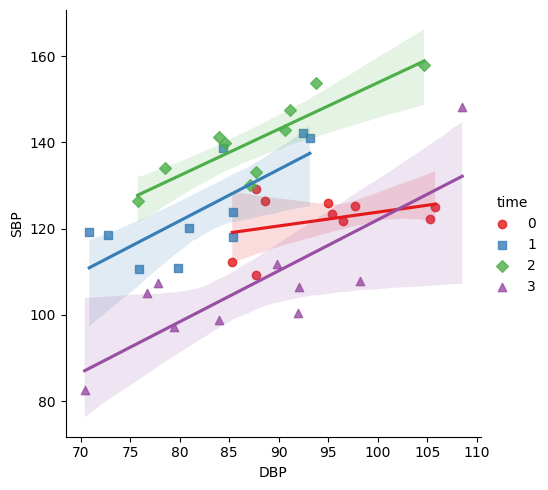

In [9]:
#데이터 프레임 산점도 그리기
sns.lmplot(
    data=df,
    x='DBP',
    y='SBP',
    hue='time',
    markers=['o','s','D','^'],
    palette='Set1',
    );

In [11]:
# 단순선형회귀분석 적용
import statsmodels.formula.api as smf

#회귀모형 생성
formula = 'SBP ~ DBP'
# OLS 클래슬호 선형회귀모형의 객체를 생성하고 fit 메서드로 모형 추정
model = smf.ols(formula, data=df).fit()

#summary 메서드로 결과 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    SBP   R-squared:                       0.203
Model:                            OLS   Adj. R-squared:                  0.182
Method:                 Least Squares   F-statistic:                     9.669
Date:                Tue, 01 Jul 2025   Prob (F-statistic):            0.00354
Time:                        10:01:09   Log-Likelihood:                -164.53
No. Observations:                  40   AIC:                             333.1
Df Residuals:                      38   BIC:                             336.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     53.7646     22.530      2.386      0.0

Text(0.5, 1.0, 'SBP vs DBP')

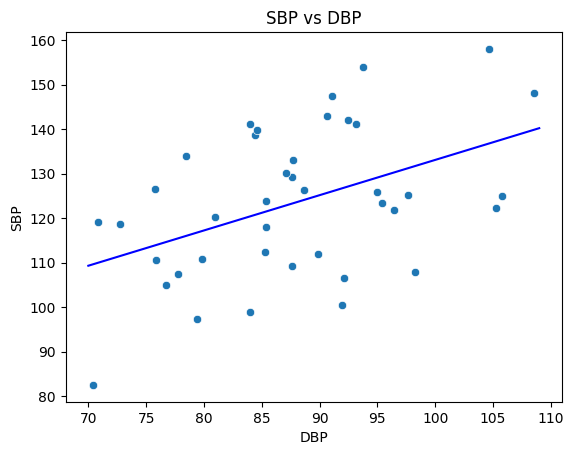

In [12]:
#산점도 그리기

sns.scatterplot(
    data=df, # 데이터프레임
    x='DBP', # x축 변수
    y='SBP', # y축 변수
    )   

#회귀선을 그리기 위한 데이터프레임 생성
#DBP의 범위 설정
x = range(70, 110)

# 예측값 계산을 위한 데이터프레임 생성
y = pd.DataFrame({'DBP': x})

# 회귀선 그리기
plt.plot(x, model.predict(y), color='blue')

# 그래프 제목 및 축 레이블 설정
plt.xlabel('DBP')
plt.ylabel('SBP')
plt.title('SBP vs DBP')

In [13]:
#더미 변수를 적용한 회귀분석
# 회귀모형 생성
formula = 'SBP ~ DBP + C(time)'

#OLS 클래스로 선형회귀모형의 객체를 생성하고 fit 메서드로 모형 추정
model = smf.ols(formula, data=df).fit()

# summary 메서드로 결과 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    SBP   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     33.26
Date:                Tue, 01 Jul 2025   Prob (F-statistic):           1.77e-11
Time:                        10:05:52   Log-Likelihood:                -137.68
No. Observations:                  40   AIC:                             285.4
Df Residuals:                      35   BIC:                             293.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       26.2035     14.761      1.775   

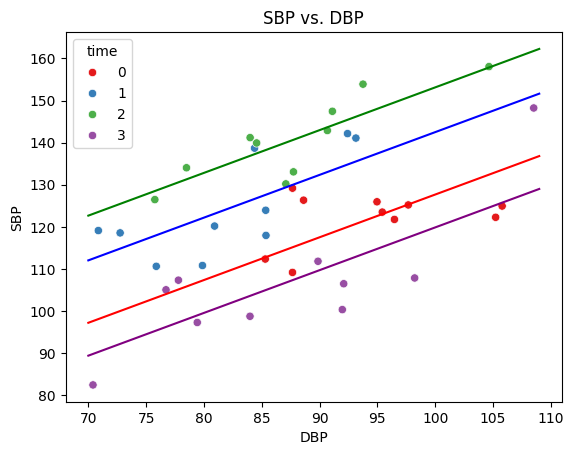

In [15]:
#산점도와 회귀선 시각화
#산점도 그리기
sns.scatterplot(
data=df, # 데이터프레임
x='DBP', # x축 변수
y='SBP', # y축 변수
hue='time', # 범주형 변수
markers=['o', 's', 'D', '^'], # 마커 모양
palette='Set1' # 색상 팔레트
)

# 회귀선을 그리기 위한 데이터프레임 생성
# DBP의 범위 설정
x = range(70, 110)

# time=0, 1, 2, 3에 대한 예측값을 계산하기 위한 데이터프레임 생성
y_0 = pd.DataFrame({'DBP': x, 'time': 0})
y_1 = pd.DataFrame({'DBP': x, 'time': 1})
y_2 = pd.DataFrame({'DBP': x, 'time': 2})
y_3 = pd.DataFrame({'DBP': x, 'time': 3})

# 회귀선 그리기
plt.plot(x, model.predict(y_0), label='time=0', color='red')
plt.plot(x, model.predict(y_1), label='time=1', color='blue')
plt.plot(x, model.predict(y_2), label='time=2', color='green')
plt.plot(x, model.predict(y_3), label='time=3', color='purple')

# 그래프 제목 및 축 레이블 설정
plt.xlabel('DBP')
plt.ylabel('SBP')
plt.title('SBP vs. DBP')
plt.show()


# 연습

더미변수를 이용한 회귀분석


In [ ]:
# 필요한 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 생성
n = 10
np.random.seed(42)

# 키(Height), 평균 170, 표준편차 15
df = pd.DataFrame({
    'Height': np.random.normal(170, 15, n*4),
    'time': np.repeat([0,1,2,3], n),
})

# 키(Height) = -100 + 1.1*키(Height) + 랜덤 노이즈
Height_0 = -100.0 + 1.02*df['Height'][:n] + np.random.randint(-15, 15, n)
Height_1 = -105.0 + 1.03*df['Height'][n:2*n] + np.random.randint(-15, 15, n)
Height_2 = -110.0 + 1.03*df['Height'][2*n:3*n] + np.random.randint(-15, 15, n)
Height_3 = -95.0 + 1.02*df['Height'][3*n:4*n] + np.random.randint(-15, 15, n)
df['Weight'] = pd.concat([Height_0,Height_1,Height_2,Height_3],axis=0)

# 데이터 확인
df 

,Height,time,Weight
0,177.450712,0,82.999727
1,167.926035,0,81.284556
2,179.715328,0,79.309635
3,192.845448,0,82.702357
4,166.487699,0,63.817453
5,166.487946,0,83.817705
6,193.688192,0,85.561956
7,181.511521,0,83.141751
8,162.957884,0,66.217042
9,178.138401,0,80.701169


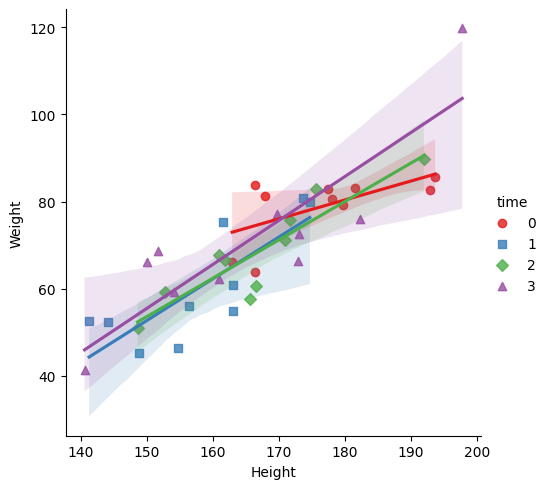

In [5]:
#데이터 프레임 산점도 그리기
sns.lmplot(
    data=df,
    x='Height',
    y='Weight',
    hue='time',
    markers=['o','s','D','^'],
    palette='Set1',
    );

In [35]:
# 단순선형회귀분석 적용
import statsmodels.formula.api as smf

#회귀모형 생성
formula = 'Weight ~ Height'
# OLS 클래슬호 선형회귀모형의 객체를 생성하고 fit 메서드로 모형 추정
model = smf.ols(formula, data=df).fit()

#summary 메서드로 결과 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     101.8
Date:                Tue, 01 Jul 2025   Prob (F-statistic):           2.65e-12
Time:                        10:49:02   Log-Likelihood:                -138.47
No. Observations:                  40   AIC:                             280.9
Df Residuals:                      38   BIC:                             284.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -79.4788     14.832     -5.359      0.0

In [36]:
print(df.columns)

Index(['Height', 'time', 'Weight'], dtype='object')


Text(0.5, 1.0, 'Weight vs Height')

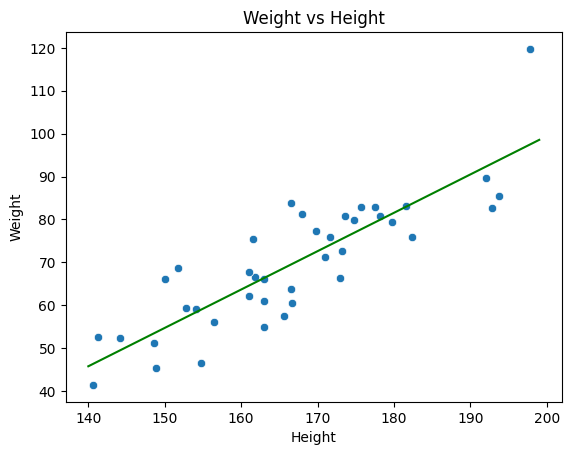

In [37]:
#산점도 그리기

sns.scatterplot(
    data=df, # 데이터프레임
    x='Height', # x축 변수
    y='Weight', # y축 변수
    )   

#회귀선을 그리기 위한 데이터프레임 생성
#Height 범위 설정
x = range(140, 200)

# 예측값 계산을 위한 데이터프레임 생성
y = pd.DataFrame({'Height': x})

# 회귀선 그리기
plt.plot(x, model.predict(y), color='green')

# 그래프 제목 및 축 레이블 설정
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Weight vs Height')



In [38]:
#더미 변수를 적용한 회귀분석
# 회귀모형 생성
formula = 'Weight ~ Height + C(time)'

#OLS 클래스로 선형회귀모형의 객체를 생성하고 fit 메서드로 모형 추정
model = smf.ols(formula, data=df).fit()

# summary 메서드로 결과 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     24.98
Date:                Tue, 01 Jul 2025   Prob (F-statistic):           7.74e-10
Time:                        10:49:41   Log-Likelihood:                -137.54
No. Observations:                  40   AIC:                             285.1
Df Residuals:                      35   BIC:                             293.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -75.4484     18.240     -4.136   

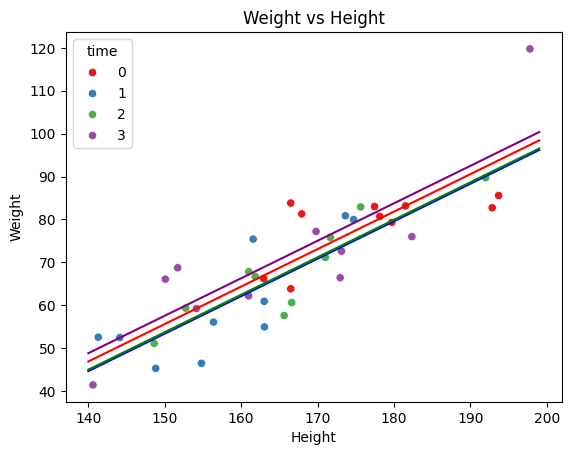

In [39]:
#산점도와 회귀선 시각화
#산점도 그리기
sns.scatterplot(
data=df, # 데이터프레임
x='Height', # x축 변수
y='Weight', # y축 변수
hue='time', # 범주형 변수
markers=['o', 's', 'D', '^'], # 마커 모양
palette='Set1' # 색상 팔레트
)

# 회귀선을 그리기 위한 데이터프레임 생성
# DBP의 범위 설정
x = range(140, 200)

# time=0, 1, 2, 3에 대한 예측값을 계산하기 위한 데이터프레임 생성
y_0 = pd.DataFrame({'Height': x, 'time': 0})
y_1 = pd.DataFrame({'Height': x, 'time': 1})
y_2 = pd.DataFrame({'Height': x, 'time': 2})
y_3 = pd.DataFrame({'Height': x, 'time': 3})

# 회귀선 그리기
plt.plot(x, model.predict(y_0), label='time=0', color='red')
plt.plot(x, model.predict(y_1), label='time=1', color='blue')
plt.plot(x, model.predict(y_2), label='time=2', color='green')
plt.plot(x, model.predict(y_3), label='time=3', color='purple')

# 그래프 제목 및 축 레이블 설정
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Weight vs Height')
plt.show()
